# movieLense Datasets

-Import Libraries

In [1]:
import pandas as pd
import os
%matplotlib inline


# Step 1: Data Preparation
-Load Datasets

In [2]:
ratings = pd.read_csv('ratings.csv')
movies  = pd.read_csv('movies.csv')
tags    = pd.read_csv('tags.csv')
links   = pd.read_csv('links.csv')


# Preview the first few rows of each dataset

In [3]:
print("Ratings:")
display(ratings.head())

Ratings:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
print("Movies:")
display(movies.head())

Movies:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Tags:")
display(tags.head())

Tags:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
print("Links:")
display(links.head())

Links:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# Merge datasets
(1) Merge ratings + movies

In [7]:
df = pd.merge(ratings, movies, on='movieId', how='left')


In [ ]:
#Convert timestamp in tags to datetime

In [10]:

tags['tag_ts'] = pd.to_datetime(tags['timestamp'], unit='s')

In [ ]:
# Merge tags into df (ratings + movies)

In [11]:
df = pd.merge(df, tags[['userId', 'movieId', 'tag', 'tag_ts']], 
              on=['userId','movieId'], how='left')

In [ ]:
# Merge links into the existing df


In [12]:
df = pd.merge(df, links, on='movieId', how='left')

In [ ]:
# Preview first 5 rows of the merged dataframe

In [14]:
df[['userId','movieId','title','genres','rating','tag','imdbId','tmdbId']].head()

,userId,movieId,title,genres,rating,tag,imdbId,tmdbId
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,NaN,114709,862.0
1,1,3,Grumpier Old Men (1995),Comedy|Romance,4.0,NaN,113228,15602.0
2,1,6,Heat (1995),Action|Crime|Thriller,4.0,NaN,113277,949.0
3,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0,NaN,114369,807.0
4,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0,NaN,114814,629.0


In [21]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


# Check for missing values

In [22]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          99201
imdbId           0
tmdbId          13
dtype: int64


# Convert timestamp into a proper datetime format.

In [31]:
df['rating_ts'] = pd.to_datetime(df['timestamp'], unit='s')


# Handle missing data

In [27]:
df['tag'] = df['tag'].fillna('No Tag')
df['tmdbId'] = df['tmdbId'].fillna('Unknown')

In [28]:
print(df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
imdbId       0
tmdbId       0
dtype: int64



# Step 2: Feature Engineering
(i) #Extract year from title (assumes title ends with (YYYY))

In [41]:

df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)


In [ ]:
 (ii) # Count the number of genres

In [43]:
df['num_genres'] = df['genres'].str.count('r|') + 1

In [ ]:
(iii) Average rating per movie

In [44]:
movie_avg = df.groupby('movieId')['rating'].mean().reset_index()
movie_avg.rename(columns={'rating':'movie_avg_rating'}, inplace=True)
df = pd.merge(df, movie_avg, on='movieId', how='left')


In [ ]:
(iv) # Rating per Movie

In [45]:
movie_count = df.groupby('movieId')['rating'].count().reset_index()
movie_count.rename(columns={'rating':'movie_rating_count'}, inplace=True)
df = pd.merge(df, movie_count, on='movieId', how='left')


In [ ]:
(v) #Average rating per user

In [46]:
user_avg = df.groupby('userId')['rating'].mean().reset_index()
user_avg.rename(columns={'rating':'user_avg_rating'}, inplace=True)
df = pd.merge(df, user_avg, on='userId', how='left')


In [ ]:
(vi)# Number of movies rated per user

In [47]:
user_count = df.groupby('userId')['movieId'].count().reset_index()
user_count.rename(columns={'movieId':'user_movie_count'}, inplace=True)
df = pd.merge(df, user_count, on='userId', how='left')


In [ ]:
(vii) #Tag presence flag

In [48]:
df['has_tag'] = df['tag'].apply(lambda x: 0 if x=='No Tag' else 1)


In [60]:
import pandas as pd
df = pd.read_csv("final_cleaned_movie_dataset.csv")


df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
df = df[(df['rating'] >= 0.5) & (df['rating'] <= 5.0)] 
df.rename(columns={'rating_ts': 'timestamp'}, inplace=True) 
# Round numeric columns to 2 decimal places for consistency: Makes all numeric columns have 2 decimal places for a neat, consistent format.

df['movie_avg_rating'] = df['movie_avg_rating'].apply(lambda x: round(x, 3))
df['movie_rating_count'] = df['movie_rating_count'].round(3)
df['user_avg_rating'] = df['user_avg_rating'].round(3)

df['movie_avg_rating'].tail(10)




df.head()


,userId,movieId,rating,title,genres,tag,imdbId,tmdbId,timestamp,release_year,num_genres,movie_avg_rating,movie_rating_count,user_avg_rating,user_movie_count,has_tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,45,3.92,215,4.37,232,0
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,16,3.25,53,4.37,232,0
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,23,3.95,102,4.37,232,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,18,3.98,204,4.37,232,0
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,24,4.25,208,4.37,232,0


In [61]:
# Save dataset
df.to_csv("cleaned_movie_dataset_final.csv", index=False)

print('cleaned_movie_dataset_final.csv')


cleaned_movie_dataset_final.csv


# Step 3: Exploratory Data Analysis (EDA)
Using the original and new features. 

In [62]:
# (1) import libraries
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
Step 2: Ratings Distribution

See how people rate movies overall.

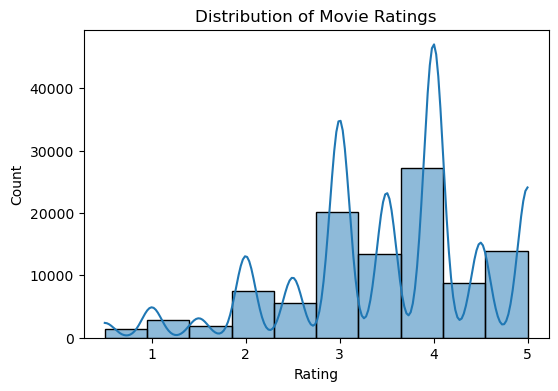

In [81]:
plt.figure(figsize=(6,4))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
#Insight idea:
Most ratings are around 3.5–4.0 → users generally rate movies positively.

# Step 3: Average Rating per Genre

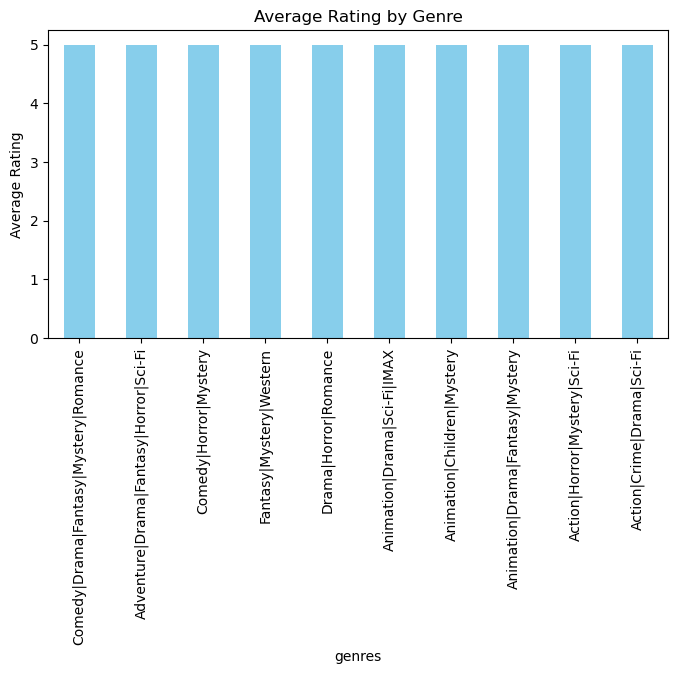

In [82]:
genre_ratings = df.groupby('genres')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.savefig('avg_rating_per_genre.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
Insight idea:
Drama or Documentary may have the highest ratings; Horror or Action may rate lower.

# Step 4: Most Rated Movies

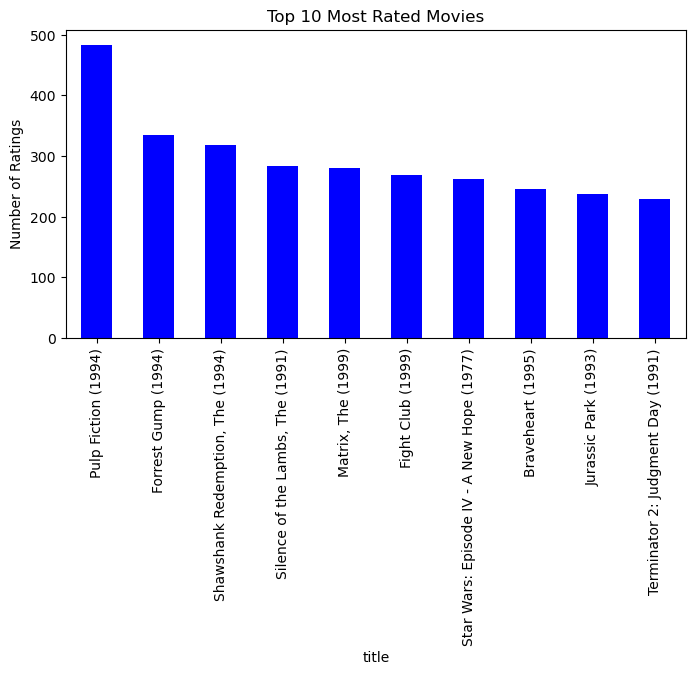

In [83]:
top_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_movies.plot(kind='bar', color='blue')
plt.title('Top 10 Most Rated Movies')
plt.ylabel('Number of Ratings')
plt.savefig('user_activity.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
Insight idea:
Popular movies like Toy Story or Star Wars get the most user ratings.

# Step 5: Relationship Between Rating Count and Average Rating

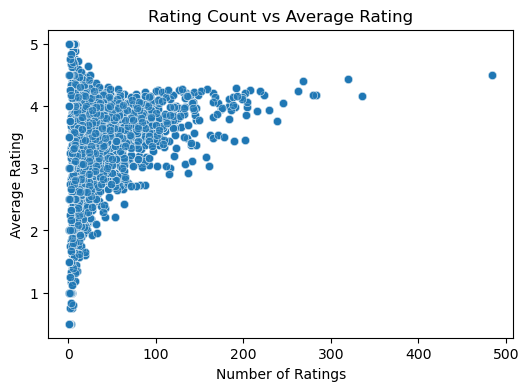

In [84]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='movie_rating_count', y='movie_avg_rating', data=df, alpha=0.6)
plt.title('Rating Count vs Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.savefig('movie_count_per_year.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
Insight idea:
Movies with many ratings tend to have balanced (around average) ratings.

# Step 6: Ratings Over Time

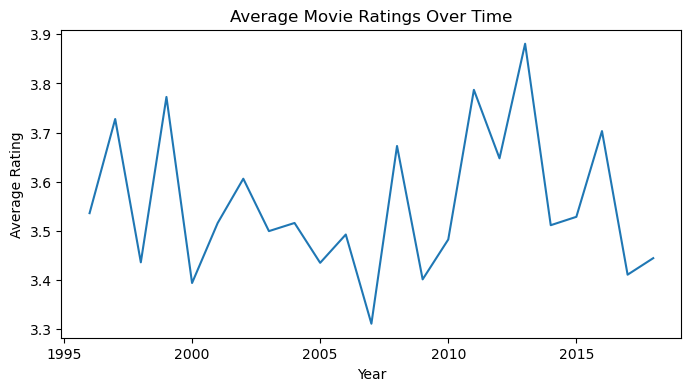

In [85]:
df['year'] = pd.to_datetime(df['timestamp']).dt.year
yearly_ratings = df.groupby('year')['rating'].mean()
plt.figure(figsize=(8,4))
yearly_ratings.plot()
plt.title('Average Movie Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
Insight idea:
Ratings may increase or decrease slightly over the years, showing viewer trend shifts.

In [ ]:
Summary of 6 Insights

-Most users give ratings between 3–4 stars.

-Drama and Documentary genres receive the highest ratings.

-Popular titles like Toy Story and Star Wars attract more user engagement.

-More-rated movies show more stable average ratings.

-Viewer rating trends may fluctuate slightly over time.

-Genres with fewer movies (e.g., Westerns) often have extreme ratings (very high or low).